In [27]:
import keras
keras.__version__

'2.1.3'

### 주택가격 예측: 회귀분석 예
- 앞에서는 분류문제를 다루었다. 여기서는 회귀문제를 풀어보겠다.


- 1970년대 보스턴의 주택가격 중앙값을 예측하는 문제를 다룬다. 범죄율, 세금율 등을 고려한다
- 주어진 샘플이 506개 밖에 없다
- 그리고 피처의 속성들이 서로 매우 성격이 다르다

In [28]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [29]:
train_data.shape

(404, 13)

In [30]:
test_data.shape

(102, 13)

- 이 데이터에서 사용하는 13개 피처는 다음과 같다


1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

- 목적 변수는 주택가격의 중앙값이다 (1000달러 단위)

In [31]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 데이터 처리
- 성격이 다른 데이터들을 신경망에 바로 입력하는 것은 문제가 있다. 신경만이 이러한 데이터의 다양성을 학습할 수는 있지만 학습하는데 어려움을 겪게 된다. 이러한 문제를 해결하는 한 방법은 각 피처별로 정규화를 하는 것이다. 여기서는 표준정규화를 하겠다.

In [32]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

- 테스트 데이터를 정규화하는데에 사용된 평균과 분산 값은 "훈련" 데이터로부터 구한 값을 사용해야 한다. (동일한 스케일링을 해야 하므로)
- 신경망 구성: 주어진 샘플의 수가 적으로므로 규모가 작은 신경망을 사용하겠다. 유닛의 크기를 64로 하겠다. 데이터가 적을수록 신경망은 과적합될 가능성이 크다. 이럴때 신경망의 크기를 작게하면 과적합을 피할 수 있다.

In [33]:
from keras import models
from keras import layers

def build_model():
    # 모델을 자주 만들 것이므로 모델을 만드는 함수를 정의했다.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

- 마지막 계층은 출력이 하나이다 (유닛이 1임). 그리고 활성화 함수를 사용하지 않는다 (즉, 선형 출력을 사용한다는 뜻임). 회귀분석을 할 때는 통상 이러한 모델을 사용한다.
- 손실함수로는 가장 널리 사용되는 mse를 사용한다.
- 성능평가 메트릭으로 mae를 사용한다.(Mean Absolute Error). mae가 0.5 발생하면 오차가 $500인 것을 나타낸다

- K-fold 검증을 수행한다.
- 훈련 데이터 수가 너무 적어서 교차 검증할 때마다 편차가 커질 것이다. 즉, 검증을 제대로 하기가 어렵다.
- K-fold 검증을 아래와 같이 수행한다.

In [34]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [35]:
all_scores

[2.133263976267069, 2.201295307367155, 2.805459466311011, 2.3357023101041814]

In [37]:
np.mean(all_scores)

2.368930265012354

- 4번의 교차 검증의 점수를 보면 2.1 ~ 2.97의 범위로 비교적 큰 셈이다.
- 성능의 평균 값인, 2.4의 의미는 주택 가격 예측의 평균 오차가 $2400라는 것이다.
- 이제 이포크를 300회 실행해보겠다. 성능의 변화를 기록해보겠다.

In [38]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [40]:
num_epochs = 300
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


이제 각 폴드에 대해서 이포크 실행시의 평균 MAE 값을 계산하겠다.

In [41]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

이를 그림으로 그리면 다음과 같다.

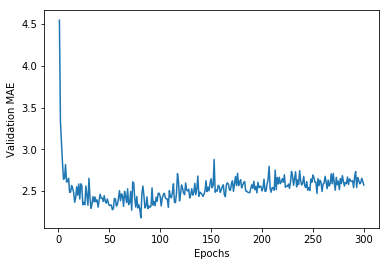

In [42]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

- 위 그래프를 보면 초기의 값이 너무 커서 그래프가 알아보기 어렵다. 처음 10개의 샘플을 제거하고 그림을 그려보겠다.
- 학습 곡선을 부드럽게 만들기 위해서 지수 가중 평균을 적용하였다.

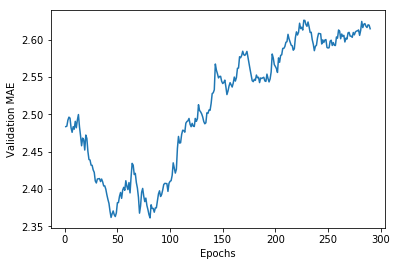

In [43]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

- 위 그림을 보면 MAE검증은 80 이포크 후에 성능이 개선되지 않는 것을 알 수 있다. 그 이후에는 과적합이 발생한다. 많이 학습할수록 좋은 것이 아니다.
- 적절한 이포크 수를 정하는 것과 별도로 적정한 계층의 수도 정해야 한다. 여러 하이퍼 파라미터를 조정해야 한다.

In [44]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 285us/step


In [45]:
test_mae_score

2.9100589658699785

약  \$2,550 정도의 오차가 발생하고 있다.

### 정리
- 회귀 분석에서는 MSE 손실함수를 사용했다.
- 성능 지표함수도 정밀도가 아니라 평균오차를 사용했다.
- 피처 값들이 서로 범위가 다를때 스케일링이 필요하다
- 데이터 수가 많지 않으면 K-fold 검증을 사용해야 한다.
- 데이터 수가 적으면 과적합을 방지하기 위해서 계층의 수를 적게 한다 (2개 정도)